<a href="https://colab.research.google.com/github/maxashoka3/EDA---Play-Store-App/blob/main/EDA_on_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis on Play Store App Review


##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.
Description of App Dataset columns
* App : The name of the app
* Category : The category of the app
* Rating : The rating of the app in the Play Store
* Reviews : The number of reviews of the app
* Size : The size of the app
* Install : The number of installs of the app
* Type : The type of the app (Free/Paid)
* Price: The price of the app (0 if it is Free)
* Content Rating : The appropiate target audience of the app
* Genres: The genre of the app
* Last Updated : The date when the app was last updated
* Current Ver : The current version of the app
* Android Ver : The minimum Android version required to run the app

       'Android Ver
The contents of User Reviews are:
1. App: It contains the name of the app with a short description (optional).
2. Translated_Review: It contains the English translation of the review dropped by the user of the app.
3. Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
4. Sentiment_Subjectivity: This value gives how close a reviewer’s opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewer’s opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.


#### **Define Your Business Objective?**

To Perform EDA 
Explore all the columns 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [578]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for worldcloud puzzle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [484]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [485]:
# Load Dataset
store_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Play Store App Review Analysis/Play Store Data.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Play Store App Review Analysis/User Reviews.csv")

### Dataset First View

In [486]:
# first 5 records
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [487]:
# watching the random sample of the store dataset
store_df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7401,Mesure CI,TOOLS,NaN,9,6.6M,500+,Free,0,Everyone,Tools,"October 4, 2016",1.0.1,4.0 and up
9271,EF Mentor: Sounds,FAMILY,NaN,19,6.9M,"5,000+",Free,0,Everyone,Education,"August 16, 2017",1.0.1.00613,4.1 and up
7666,2-Player Co-op Zombie Shoot,GAME,4.2,33,13M,"1,000+",Free,0,Teen,Action,"July 1, 2018",1.0.13,2.3 and up
6761,Black Survival,FAMILY,4.4,48451,52M,"1,000,000+",Free,0,Teen,Strategy,"August 1, 2018",4.6.00,4.0.3 and up
6603,BP Tracker,HEALTH_AND_FITNESS,4.3,12,613k,"1,000+",Free,0,Everyone,Health & Fitness,"February 20, 2016",1.0.0,5.0 and up
3107,CityMaps2Go Plan Trips Travel Guide Offline Maps,TRAVEL_AND_LOCAL,4.3,64713,58M,"1,000,000+",Free,0,Everyone,Travel & Local,"June 9, 2018",10.9.8 (Play),5.0 and up
957,Telemundo Now,ENTERTAINMENT,3.9,8674,19M,"1,000,000+",Free,0,Teen,Entertainment,"May 25, 2018",3.3.1.42,4.4 and up
2124,DC Super Hero Girls™,FAMILY,4.3,43060,95M,"5,000,000+",Free,0,Everyone,Action;Action & Adventure,"June 29, 2018",2.8.0,4.0 and up
9395,Grand Bat Superhero Flying Assault Rescue Mission,GAME,4.4,1094,37M,"500,000+",Free,0,Teen,Action,"July 9, 2018",1.1,4.1 and up
871,StarTimes - Live International Champions Cup,ENTERTAINMENT,4.4,17682,9.7M,"1,000,000+",Free,0,Everyone,Entertainment,"August 3, 2018",5.2,4.0.3 and up


In [488]:
# watching the first 5 record of the rating dataset
rating_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [489]:
# viewing the top 20 records to the rating dataset
rating_df.sample(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
30345,Create A Superhero HD,NaN,NaN,NaN,NaN
17713,Brightest Flashlight Free ®,NaN,NaN,NaN,NaN
37988,EMT Tutor NREMT-B Study Guide,NaN,NaN,NaN,NaN
51555,GPS Speedometer and Odometer,NaN,NaN,NaN,NaN
16348,Blood Pressure Log - MyDiary,This saved life. I episodes sudden large spike...,Positive,0.054665,0.466394
20462,COOKING MAMA Let's Cook!,It's kawaii,Neutral,0.000000,0.000000
12289,Banfield Pet Health Tracker,"Love Everything easily accessible, vaccines I ...",Positive,0.156667,0.383333
51956,Galaxy Attack: Alien Shooter,I much like game year ago I deleted I spent lo...,Negative,-0.100000,0.183333
13942,Been Together (Ad) - D-day,NaN,NaN,NaN,NaN
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


### Dataset Rows & Columns count

In [490]:
# Dataset Rows & Columns count
print(f"Store_df: \n The number of rows  is {store_df.shape[0]} \n The column  is{store_df.shape[1]}")

print(f"Rating_df: \n The number of rows  is {rating_df.shape[0]} \n The column in user review is{rating_df.shape[1]}")

Store_df: 
 The number of rows  is 10841 
 The column  is13
Rating_df: 
 The number of rows  is 64295 
 The column in user review is5


### Dataset Information

In [491]:
# Dataset Info
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


From here only we can tell that except App column every columns has around 40% Null values present in the rating dataset.

In [492]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


It can be observed that many rows has alot of missng or null values.

#### Duplicate Values

In [493]:
# Dataset Duplicate Value Count
store_df.duplicated().value_counts()

False    10358
True       483
dtype: int64

There are 483 number of rows that are duplicate.So It need to be removed.

In [494]:
# number of duplicate value
rating_df.duplicated().value_counts()

True     33616
False    30679
dtype: int64

More than half of the rows have duplicate value. It is needed to remove the duplicate values in the dataset as it may cause the bais in the analysis

In [495]:
# removing the duplicate value from the both dataset
rating_df.drop_duplicates(inplace = True)
store_df.drop_duplicates(inplace = True)

We have completly removed the duplicates values

#### Missing Values/Null Values

In [496]:
# Missing Values/Null Values Count in the rating dataset
print(rating_df.isnull().sum())

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64


In [497]:
# Missing Values/Null Values Count in the rating dataset
print(store_df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


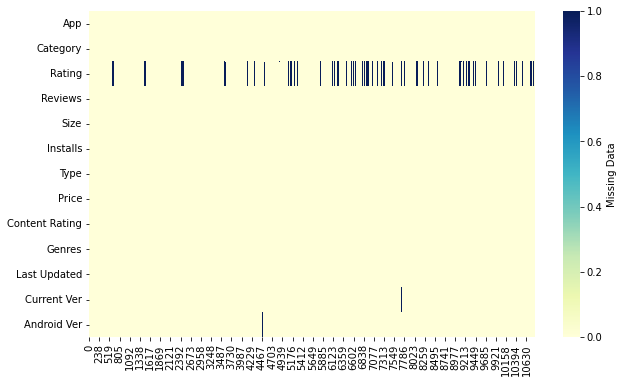

In [498]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

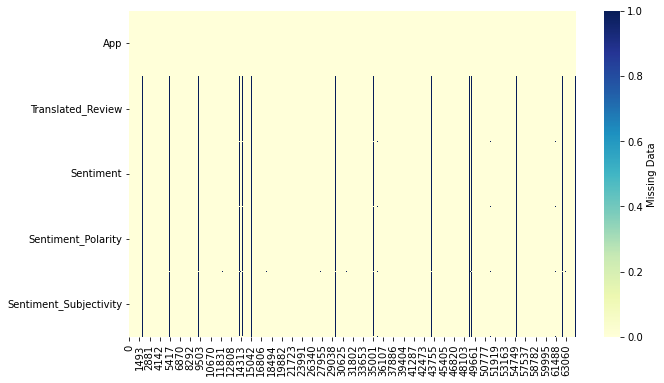

In [499]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(rating_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### What did you know about your dataset?

We are working with two dataset.

  * Play Store 
  * User Reviews

* In play store dataset we have 10841 numbers of rows and 13 number of columns. 
* We have missing values in Rating, Type, Content Rating and Android ver. 
* It has 483 number of duplicate values presents in the play store data 
* Column Reviews,Size,Installs and Price are wrong type as they musht of the numeric type.
* Size are represented as the string with the value concatinated M and K as the end character.
* Price values have symbol '$' in the end.
* Install has the character '+' at the end of the string.

In User Reviews, We have 64296 numbers of rows and 5 nunber of the columns. It has 30679 number of null/missing values in all the columns excepts the App.
All the duplicates values have been removed


## ***2. Understanding Your Variables***

### Variables Description 

In [500]:
# Dataset Describe
rating_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


In [501]:
# Dataset Describe
store_df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Check Unique Values for each variable and removing if found suspious

In [502]:
df= store_df.copy()

In [503]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##### App

In [504]:
# viewing the unique values of App 
df['App'].unique().tolist()

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
 'Sketch - Draw & Paint',
 'Pixel Draw - Number Art Coloring Book',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker - Smoke Editor',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free - Drawing Fun',
 'Text on Photo - Fonteee',
 'Name Art Photo Editor - Focus n Filters',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 'Learn To Draw Kawaii Characters',
 'Photo Designer - Write your name with shapes',
 '350 Diy Room Decor Ideas',
 'FlipaClip - Cartoon animation',
 'ibis Paint X',
 'Logo Maker - Small Business',
 "Boys Photo Editor - Six Pack & Men's Suit",
 'Superheroes Wallpapers | 4K Backgrounds',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit - Drawing & Coloring',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',

##### Category

In [505]:
# viewing the unique values of the category

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

##### Rating

In [506]:
# checking the rating columns
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Here we can see nan and 19 cannot be values as its rating values ranges from 1 to 5 only.

In [507]:
missing_rating = df['Rating'].isnull().sum()/len(df['Rating']) * 100
print(f"Missing percent is in Rating is {missing_rating}%")
#Rating has 1465 missing values which is more than 10% of the total data 

Missing percent is in Rating is 14.143657076655725%


It can be seen that Rating has around 14% of data are null. or It can be said that around 14 % of the user hasnt rated the app. So we will remove them.

In [508]:
#user not rated the app 
not_rated_user = df['Rating'].isnull().sum()
print(f"The total number of the users has not  rated the is {not_rated_user}")

The total number of the users has not  rated the is 1465


In [509]:
# Removing the rows which contains the null values in the rows.
df.dropna(subset = ['Rating'],inplace = True)

In [510]:
# Removing the rows which has rating '19' as the outliers
df= df[df['Rating'] != 19]

##### Review


In [511]:
df['Reviews'].unique().tolist()

['159',
 '967',
 '87510',
 '215644',
 '167',
 '178',
 '36815',
 '13791',
 '121',
 '13880',
 '8788',
 '44829',
 '4326',
 '1518',
 '55',
 '3632',
 '27',
 '194216',
 '224399',
 '450',
 '654',
 '7699',
 '118',
 '192',
 '20260',
 '203',
 '136',
 '223',
 '1120',
 '227',
 '5035',
 '1015',
 '353',
 '564',
 '8145',
 '36639',
 '158',
 '591',
 '117',
 '176',
 '295221',
 '2206',
 '26',
 '174531',
 '1070',
 '85',
 '845',
 '367',
 '1598',
 '284',
 '17057',
 '129',
 '542',
 '10479',
 '805',
 '1403',
 '3971',
 '534',
 '7774',
 '38846',
 '2431',
 '6090',
 '295',
 '190',
 '40211',
 '356',
 '52530',
 '116986',
 '1379',
 '271920',
 '736',
 '7021',
 '197',
 '737',
 '3574',
 '994',
 '197136',
 '142',
 '15168',
 '2155',
 '138',
 '5414',
 '21777',
 '348',
 '250',
 '13372',
 '7880',
 '3617',
 '4806',
 '65786',
 '31433',
 '5097',
 '1754',
 '2680',
 '1288',
 '18900',
 '49790',
 '1150',
 '1739',
 '32090',
 '2225',
 '4369',
 '8572',
 '964',
 '42050',
 '104',
 '17934',
 '601',
 '36',
 '187',
 '30',
 '134',
 '74',
 

In [575]:
#Review's data type is string but it needed to be in the float. 
# converting the review column as the float type
df['Reviews']  = df['Reviews'].apply(int)

##### Size

In [ ]:
df['Size'].unique().tolist()

In [514]:
df['Size'].sample(20)

6224                    18M
10578                   31M
4780                    17M
5876                   3.7M
6587                   2.6M
9768                   5.8M
4312                   4.5M
1806                    48M
5964     Varies with device
8739                   785k
3429                   9.7M
10682                   36M
166                     23M
5083                   3.7M
385      Varies with device
1211                    39M
1937                    31M
4171                    14M
6413                    23M
5045                   3.0M
Name: Size, dtype: object

Size values has lots of problems
* its data type is string
* It contains the value "Varies with device"
* Its value contain M for Million & K for thousand at the end of the 
* These values need to be transformed into the right format in the columns.

In [515]:
# Replacing the "Varies with device to nan"
df['Size'] = df['Size'].apply(lambda x: str(x).replace("Varies with device",'nan') if 'Varies with device' in str(x) else x)
# Removing the M
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
# Removing the k and converting the values into float
df['Size'] =  df['Size'].apply(lambda x: float(str(x).replace('k', ""))/1000 if 'k' in str(x) else x)
# changing the Size columns all values to the float
df['Size']=  df['Size'].apply(float)

In [516]:
# Checking again if transformation took place or not
df['Size'].unique().tolist()

[19.0,
 14.0,
 8.7,
 25.0,
 2.8,
 5.6,
 29.0,
 33.0,
 3.1,
 28.0,
 12.0,
 20.0,
 21.0,
 37.0,
 2.7,
 5.5,
 17.0,
 39.0,
 31.0,
 4.2,
 23.0,
 6.0,
 6.1,
 4.6,
 9.2,
 5.2,
 11.0,
 24.0,
 nan,
 9.4,
 15.0,
 10.0,
 1.2,
 26.0,
 8.0,
 7.9,
 56.0,
 57.0,
 35.0,
 54.0,
 0.201,
 3.6,
 5.7,
 8.6,
 2.4,
 27.0,
 2.5,
 7.0,
 16.0,
 3.4,
 8.9,
 3.9,
 2.9,
 38.0,
 32.0,
 5.4,
 18.0,
 1.1,
 2.2,
 4.5,
 9.8,
 52.0,
 9.0,
 6.7,
 30.0,
 2.6,
 7.1,
 22.0,
 6.4,
 3.2,
 8.2,
 4.9,
 9.5,
 5.0,
 5.9,
 13.0,
 73.0,
 6.8,
 3.5,
 4.0,
 2.3,
 2.1,
 42.0,
 9.1,
 55.0,
 0.023,
 7.3,
 6.5,
 1.5,
 7.5,
 51.0,
 41.0,
 48.0,
 8.5,
 46.0,
 8.3,
 4.3,
 4.7,
 3.3,
 40.0,
 7.8,
 8.8,
 6.6,
 5.1,
 61.0,
 66.0,
 0.079,
 8.4,
 3.7,
 0.118,
 44.0,
 0.695,
 1.6,
 6.2,
 53.0,
 1.4,
 3.0,
 7.2,
 5.8,
 3.8,
 9.6,
 45.0,
 63.0,
 49.0,
 77.0,
 4.4,
 70.0,
 9.3,
 8.1,
 36.0,
 6.9,
 7.4,
 84.0,
 97.0,
 2.0,
 1.9,
 1.8,
 5.3,
 47.0,
 0.556,
 0.526,
 76.0,
 7.6,
 59.0,
 9.7,
 78.0,
 72.0,
 43.0,
 7.7,
 6.3,
 0.334,
 93.0,
 65.0,
 79.0,

In [517]:
#describing the Size
df['Size'].describe()


count    7424.000000
mean       22.747621
std        23.434790
min         0.008500
25%         5.100000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

In [518]:
# Checking null values
df['Size'].isnull().sum()

1468

In [519]:
# removing the null values from the column 'Size'
df.fillna(df['Size'].mean(),inplace= True)

##### Installs

In [520]:
list(df['Installs'].unique())

['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '100+',
 '500+',
 '10+',
 '5+',
 '50+',
 '1+']

It contains "+" & "," and string as type so it "+" & "," needed to remove and should converted to int

In [521]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','') if '+' in x else x)
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',' ,'') if ',' in x else x)
df['Installs'] = df['Installs'].apply(int)

In [522]:
df['Installs'].unique().tolist()



[10000,
 500000,
 5000000,
 50000000,
 100000,
 50000,
 1000000,
 10000000,
 5000,
 100000000,
 1000000000,
 1000,
 500000000,
 100,
 500,
 10,
 5,
 50,
 1]

In [523]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [524]:
# Checking whether it has NA/Null values
df['Installs'].isnull().sum()

0

##### Type

In [525]:
# Checking the unique values of Type
df['Type'].unique().tolist()

['Free', 'Paid']

##### Price

In [527]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Price 
* It can be see from the array that it contains "$". So it need to be removed
* It is string type, needed to be converted to float

In [528]:
# Removing "$" 
df['Price'] = df['Price'].apply( lambda x: x.replace("$","" ) if "$" in x else x )
# Converting Price values float
df['Price'] = df['Price'].apply(float)

In [529]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##### Content Rating

In [530]:
# unique values of Content Rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

##### Genres

In [531]:
# Uniques values of Genres
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

If we look closer at the values then it is composed of **Genres and sub_genres** separated by **;**. So we will be making the two new columns whose first part will be Genres and other part will be sub_genres
* Genres
* Sub_genres

In [532]:
# Triming the Second part sepated by ";"
df['Sub_genres'] =  df['Genres'].apply(lambda x : x.split(";",1)[1] if ';' in x else x)
# Triming the First part sepated by ";"
df['Genres_board'] = df['Genres'].apply(lambda x : x.split(";", 1)[0] if ';' in x else x)

In [533]:
df['Sub_genres'].unique()

array(['Art & Design', 'Pretend Play', 'Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Communication', 'Dating', 'Education', 'Music & Video',
       'Action & Adventure', 'Brain Games', 'Entertainment', 'Events',
       'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Arcade', 'Casual', 'Card',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Simulation', 'Adventure', 'Board', 'Trivia',
       'Role Playing', 'Medical', 'Social', 'Shopping', 'Photography',
       'Travel & Local', 'Tools', 'Personalization', 'Productivity',
       'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [534]:
# Checking if its updated or not in Genres
df['Genres_board'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [535]:
# Checking the random values 
df[['Genres_board','Genres','Sub_genres']].sample(40)

,Genres_board,Genres,Sub_genres
4766,Personalization,Personalization,Personalization
7011,Casual,Casual;Creativity,Creativity
1249,Food & Drink,Food & Drink,Food & Drink
8982,Tools,Tools,Tools
5026,Education,Education,Education
7979,Business,Business,Business
5092,Tools,Tools,Tools
5095,Simulation,Simulation,Simulation
8274,Travel & Local,Travel & Local,Travel & Local
1860,Role Playing,Role Playing,Role Playing


##### Last Updated

In [536]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

##### Android Ver, Current Ver

In [555]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', 22.74762116109914, '5.0 - 6.0', '1.0 and up'],
      dtype=object)

In [538]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [539]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sub_genres', 'Genres_board'],
      dtype='object')

W

In [565]:
new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sub_genres,Genres_board
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Pretend Play,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Creativity,Art & Design


##### Checking Category, Genres and Broad Genres

In [568]:
df[['Category','Genres','Genres_board']].sample(10)

,Category,Genres,Genres_board
2700,SHOPPING,Shopping,Shopping
3312,TOOLS,Tools,Tools
7542,TOOLS,Tools,Tools
4519,BUSINESS,Business,Business
5566,FAMILY,Entertainment,Entertainment
4287,FINANCE,Finance,Finance
8181,FAMILY,Entertainment,Entertainment
3337,TOOLS,Tools,Tools
5791,VIDEO_PLAYERS,Video Players & Editors,Video Players & Editors
1941,GAME,Action,Action


They are looking like the same but lets again check their unique values

In [569]:
print(df['Category'].unique().tolist())
print(df['Genres_board'].unique().tolist())
print(df['Genres'].unique().tolist())


['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Communication', 'Dating', 'Education', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational', 'Music & Audio', 'Video Players & Editors', 'Medical', 'Social', 'Shopping', 'Phot

Category is slightly different than the Genres_board but Genres is too much different than the Generes_board and Generes board is sub set of the Genres so we are removing Generes

In [573]:
#deleting the Genres columns
df.drop("Genres",inplace = True,axis = 1)

### What all manipulations have you done and insights you found?

Manupulation done in the data is given by :
* Review:
  * we converted type to proper type i.e int
* Rating:
  * we deleted the 14.14 % of data as it contains the NULL/NA values
  * We have removed the outliers i.e 19 as rating can only range from 1-5
  * we converted type to proper type i.e float 
* Size:
  * we converted type to proper type i.e float 
  * It contains the values with M - Million and K - thousand. So we removed these and converted K to the Million.
  * It contained "Varies with device" that is replaced with NAN
  * Null values are imputed with mean
* Installs
  * It contains character like "+", "&" and "," in the Installs field So they are removed.
  * Its field is converted to the int
* Price
  * It contains character "$" in the every fields of the Price so it need to be removed from every field.
  * It is string type so it needed to converted to float.
* Genres:
  * It basically contains the two part i.e Genres and its sub Genres. so it needed to create two columns with two parts. i.e Genres_board and Sub_genres. After creating new columns, it does not have any work as it also resemble too much with category so we removed the genres.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Word cloud of App

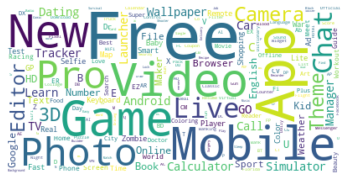

In [585]:
# Chart - 1 visualization code
text2 = " ".join(title for title in df.App)
 
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

##### 1. Why did you pick the specific chart?

Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from data source.These keywords are single words that depict the context of the whole documents.These words are clustered together to form a word cloud
Word Clouds came out to be a game-changer visualization technique for understanding and determining patterns and evolving trends. 
Each word has variable font size and color tone.Thus this representation helps to determine words of prominence.  bigger font size of a word portrays its prominence more relative to other words in the cluster. Mostly Frequency of words define the shape and size of the word.

##### 2. What is/are the insight(s) found from the chart?

Insights are: 
* Mostly Free app are used and is in the trends nowadays
* The most used app types are Game, mobile, Photo,live,camera etc

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be seen that mostly free app are used. It can lead the business to downgrade if everbody want to use the freee app then it will be impossible for  any organization to earn profit.
* Mostly used app are associated with gamming, mobile, photo, live, camera, chat and so on. This kind of app shows that social networking kind of app will be mostly used in present and future.

#### Chart - 2

In [541]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [542]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [543]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [544]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [545]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [546]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [547]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [548]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [549]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [550]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [551]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [552]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [553]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [554]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***